In [1]:
from DP.linear_solver import LinearSolver
from DP.pga_edges_modified_objective import PGAModifiedEdgeTraversal
from DP.DP_tester import DP_tester
from DP.utils import (
    print_matrix,
    binom_optimal_privacy,
    fisher_information_privatized,
    reduce_optimal_matrix
)
import numpy as np

In [2]:
N = 10
EPSILON = 1.0
THETA = 0.01

opt_q, status, history = binom_optimal_privacy(PGAModifiedEdgeTraversal(), N, EPSILON, THETA)
print_matrix(reduce_optimal_matrix(opt_q))
print(status)
print(fisher_information_privatized(opt_q, N, THETA))
print("==================")

opt_q, _, _ = binom_optimal_privacy(LinearSolver(), N, EPSILON, THETA)
print_matrix(opt_q)
print(fisher_information_privatized(opt_q, N, THETA))

row 0: 0.19761020730708145	0.0726967124272581	0.07269678030554866	0.0726967628927496	0.1377531699043297	0.149499875842318	0.14000221762671247	0.19057036766241342	0.1576013953598315	0.15446571565027445	0.1401491789431632
row 1: 0.15374754576836538	0.41792913817505734	0.4179289776114788	0.4179289317795615	0.21123698713104277	0.19141959111459111	0.18189133405063843	0.1917253926047736	0.19217876684271323	0.1844252778664465	0.18671368433932783
row 2: 0.11519400779493694	0.3131296747282053	0.31312951416383633	0.31312966775616674	0.21925491884967227	0.20398483545302049	0.16902347223006123	0.20443236562775224	0.20488418019171162	0.18824289646680029	0.16914572293626307
row 3: 0.30551259754513765	0.11239178321302458	0.11239185112704864	0.11239183367394333	0.2509889854628815	0.2744172697313317	0.29665914754806455	0.22278459869643952	0.22120518067264075	0.2545902989072425	0.2858657907769093
row 4: 0.22793394241045148	0.0838521910132236	0.08385225887342079	0.0838522414653237	0.18076576189642665	0.1

4it [00:05,  1.35s/it]


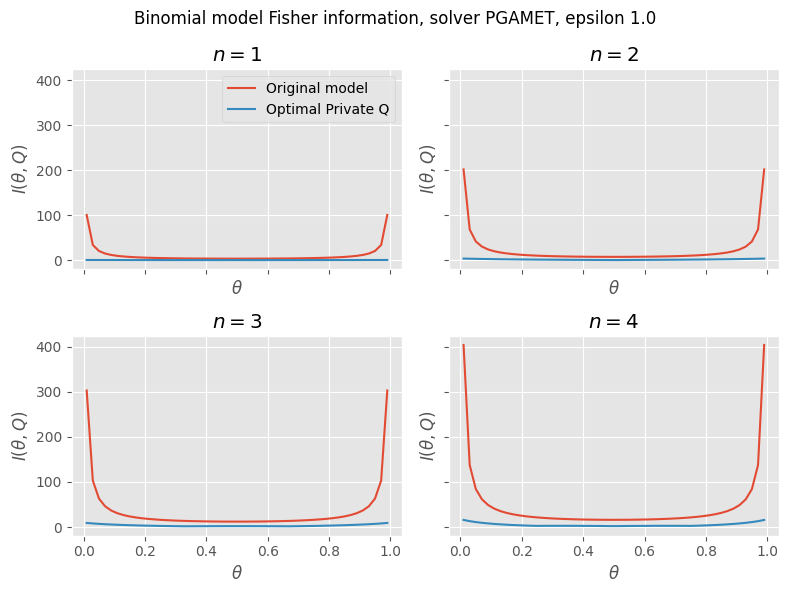

In [3]:
DP_tester.plot_fisher_infos(PGAModifiedEdgeTraversal(), ns=[1, 2, 3, 4], epsilon=1.0)

 24%|██▍       | 12/50 [00:02<00:07,  5.22it/s]/Users/matej.vedak/Desktop/University of Vienna/Lukas master thesis/locally_efficient_differential_privacy/venv/lib/python3.12/site-packages/cvxpy/problems/problem.py:1407: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
100%|██████████| 50/50 [00:09<00:00,  5.45it/s]

[]


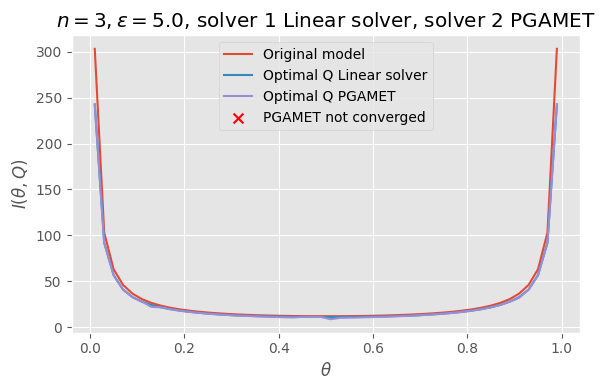

In [4]:
DP_tester.compare_fisher_two_solvers(LinearSolver(), PGAModifiedEdgeTraversal(), 3, 5.0)

100%|██████████| 50/50 [00:02<00:00, 16.92it/s]

[]


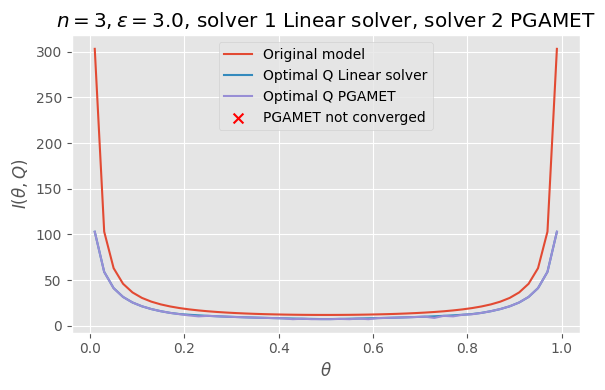

In [5]:
DP_tester.compare_fisher_two_solvers(LinearSolver(), PGAModifiedEdgeTraversal(), 3, 3.0)

100%|██████████| 50/50 [00:37<00:00,  1.33it/s]

[]


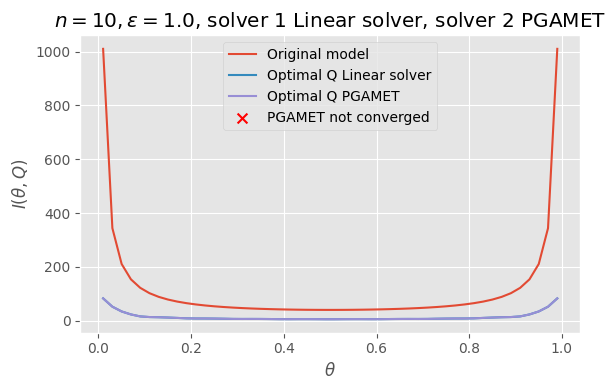

In [3]:
DP_tester.compare_fisher_two_solvers(LinearSolver(), PGAModifiedEdgeTraversal(), 10, 1.0)

100%|██████████| 50/50 [00:30<00:00,  1.65it/s]

[0.13]


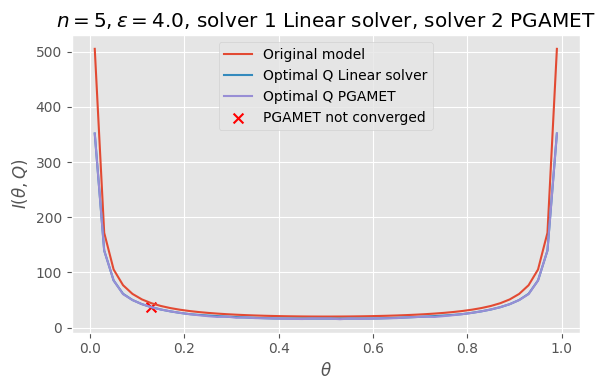

In [5]:
DP_tester.compare_fisher_two_solvers(LinearSolver(), PGAModifiedEdgeTraversal(), 5, 4.0)

0it [00:00, ?it/s]

1it [00:01,  1.60s/it]/Users/matej.vedak/Desktop/University of Vienna/Lukas master thesis/locally_efficient_differential_privacy/venv/lib/python3.12/site-packages/cvxpy/problems/problem.py:1407: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
10it [32:58, 197.85s/it]


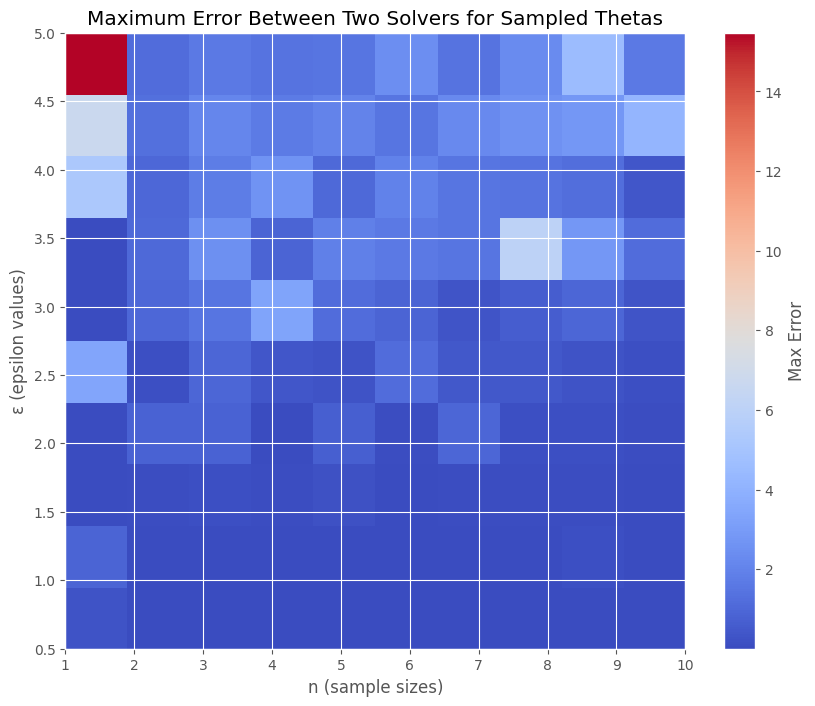

In [11]:
results = DP_tester.max_discrepancy_between_two_solvers(
    LinearSolver(), 
    PGAModifiedEdgeTraversal(), 
    np.arange(10) + 1, 
    [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0], 
    sampled_thetas=20
)

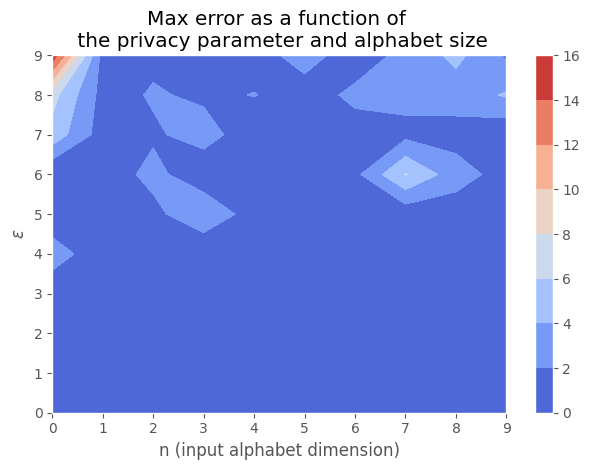

In [13]:
import matplotlib.pyplot as plt

plt.contourf(results.T, cmap="coolwarm")
plt.colorbar()
plt.xlabel("n (input alphabet dimension)")
plt.ylabel(r"$\epsilon$")
plt.title("Max error as a function of \n the privacy parameter and alphabet size")
plt.tight_layout()
plt.show()

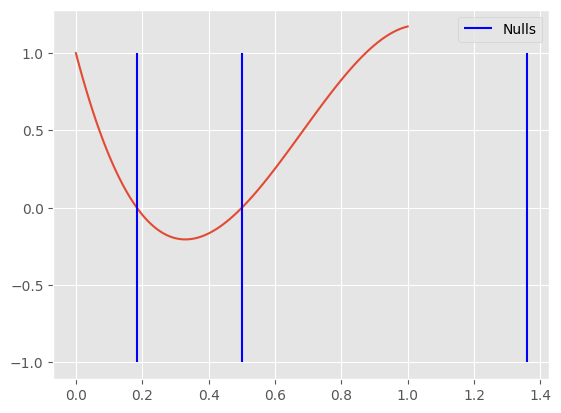

In [26]:
vals = np.linspace(0, 1, 100)

def f(ys, x):
    return -(ys / x - np.exp(-1)) * (ys / x - 1) * (ys / x - np.exp(1))

plt.plot(vals, f(vals, 0.5))
plt.vlines([np.exp(-1)*0.5, 0.5, np.exp(1)*0.5], -1, 1, colors="blue", label="Nulls")
plt.legend()
plt.show()

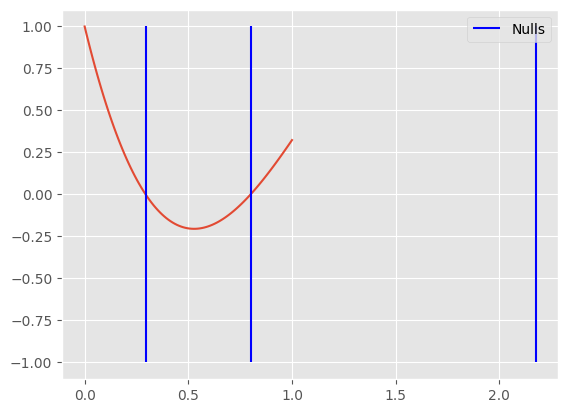

In [27]:
vals = np.linspace(0, 1, 100)

def f(ys, x):
    return -(ys / x - np.exp(-1)) * (ys / x - 1) * (ys / x - np.exp(1))

plt.plot(vals, f(vals, 0.8))
plt.vlines([np.exp(-1)*0.8, 0.8, np.exp(1)*0.8], -1, 1, colors="blue", label="Nulls")
plt.legend()
plt.show()

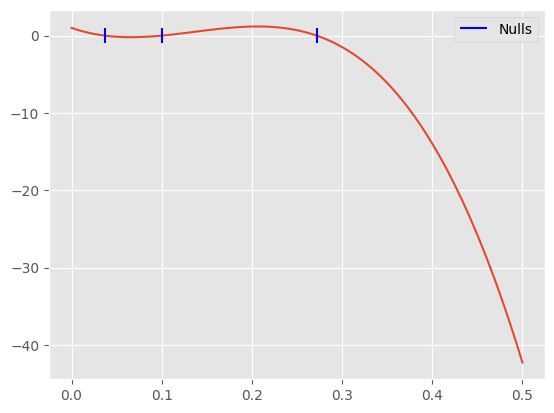

In [29]:
vals = np.linspace(0, 0.5, 100)

def f(ys, x):
    return -(ys / x - np.exp(-1)) * (ys / x - 1) * (ys / x - np.exp(1))

plt.plot(vals, f(vals, 0.1))
plt.vlines([np.exp(-1)*0.1, 0.1, np.exp(1)*0.1], -1, 1, colors="blue", label="Nulls")
plt.legend()
plt.show()

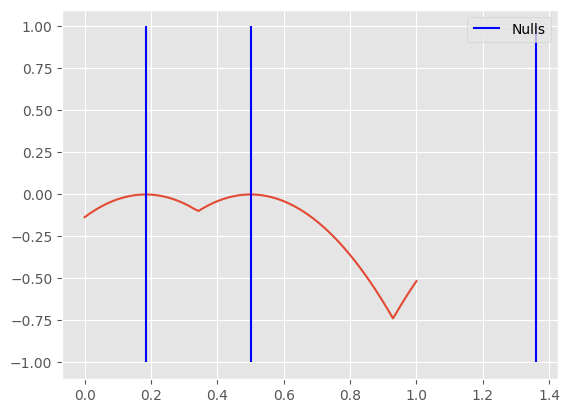

In [34]:
def logsum(vals, x, sigma=1e-3):
    return +sigma * np.log(
        np.exp(-(vals/x - np.exp(-1))**2/sigma) + 
        np.exp(-(vals/x - 1)**2/sigma) + 
        np.exp(-(vals/x - np.exp(1))**2/sigma))

vals = np.linspace(0, 1, 100)

plt.plot(vals, logsum(vals, 0.5))
plt.vlines([np.exp(-1)*0.5, 0.5, np.exp(1)*0.5], -1, 1, colors="blue", label="Nulls")
plt.legend()
plt.show()

/var/folders/lv/9hw1_pzj1hs5c2glqrzn04m80000gq/T/ipykernel_43422/2608740757.py:2: RuntimeWarning: divide by zero encountered in log
  return +sigma * np.log(


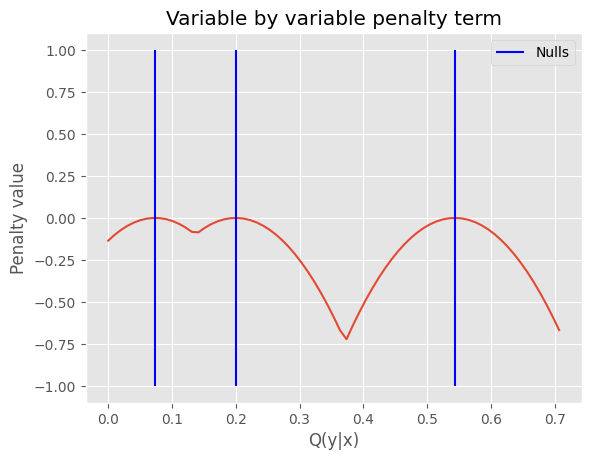

In [38]:
vals = np.linspace(0, 1, 100)

plt.plot(vals, logsum(vals, 0.2))
plt.vlines([np.exp(-1)*0.2, 0.2, np.exp(1)*0.2], -1, 1, colors="blue", label="Nulls")
plt.legend()
plt.ylabel("Penalty value")
plt.xlabel("Q(y|x)")
plt.title("Variable by variable penalty term")
plt.show()

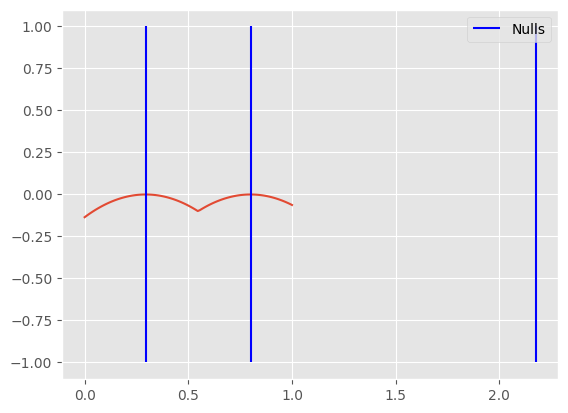

In [36]:
vals = np.linspace(0, 1, 100)

plt.plot(vals, logsum(vals, 0.8))
plt.vlines([np.exp(-1)*0.8, 0.8, np.exp(1)*0.8], -1, 1, colors="blue", label="Nulls")
plt.legend()
plt.show()